In [1]:
from scipy import misc
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
-

Tensor("shuffle_batch_1:0", shape=(50, 48, 24, 1), dtype=float64) Tensor("shuffle_batch_1:1", shape=(50,), dtype=int32)
3


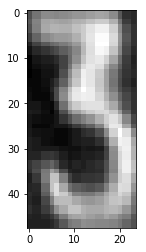

E


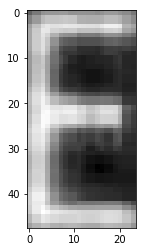

R


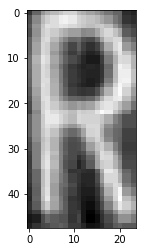

F


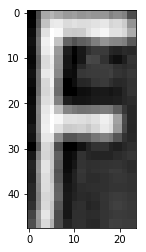

A


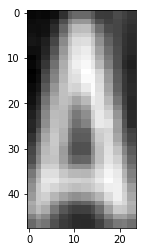

Y


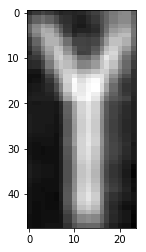

L


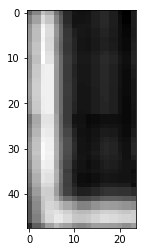

0


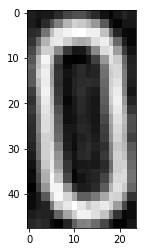

A


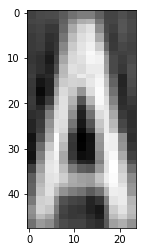

5


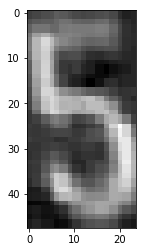

8


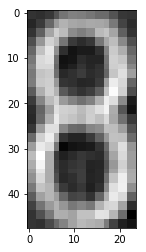

5


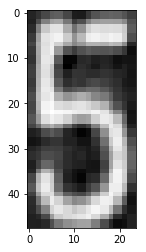

B


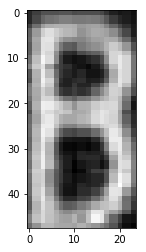

E


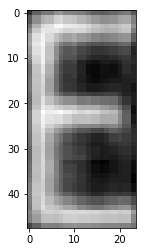

A


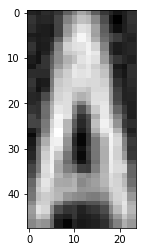

6


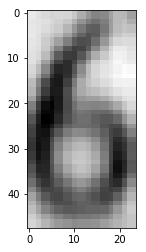

U


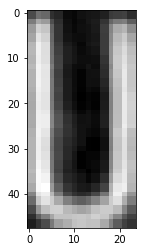

0


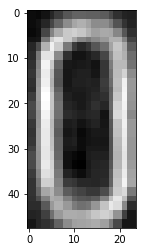

S


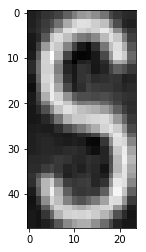

T


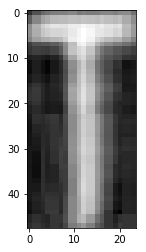

E


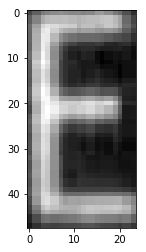

W


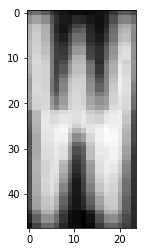

8


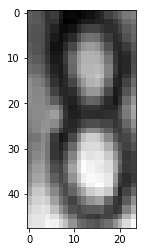

A


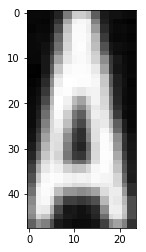

J


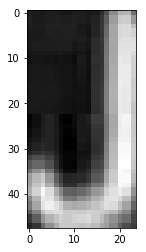

B


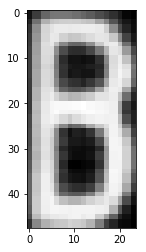

H


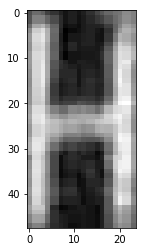

A


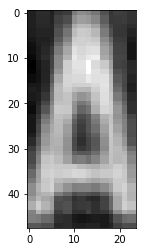

L


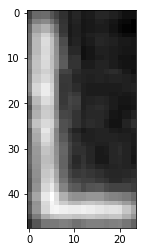

C


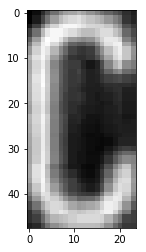

S


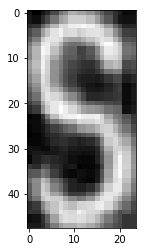

N


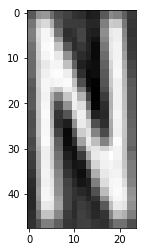

4


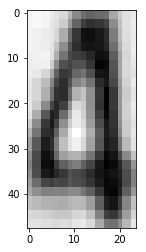

G


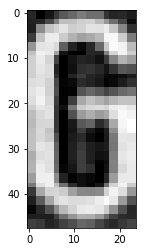

6


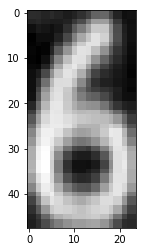

J


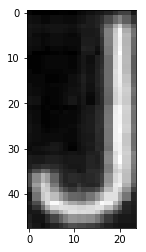

C


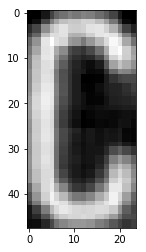

9


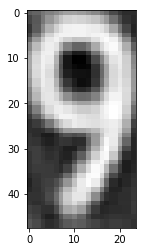

H


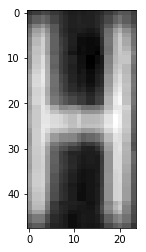

B


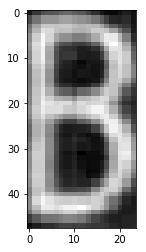

8


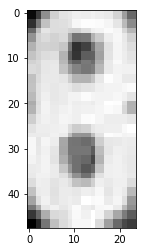

T


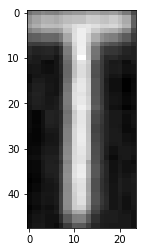

H


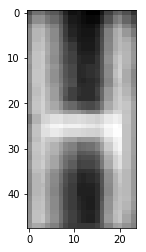

2


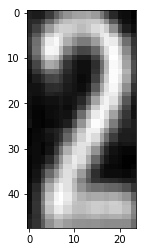

N


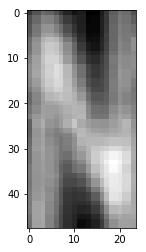

U


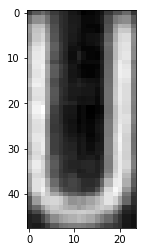

U


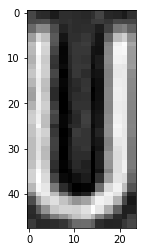

H


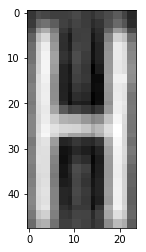

L


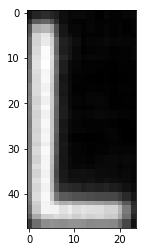

L


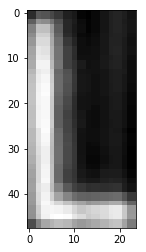

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer/input_producer_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](input_producer, input_producer/RandomShuffle)]]

Caused by op 'input_producer/input_producer_EnqueueMany', defined at:
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/haiyang/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/haiyang/venv/lib/python3.6/sit

IndexError: index 50 is out of bounds for axis 0 with size 50

In [4]:
img, label = read_and_decode("train.tfrecords")

#使用shuffle_batch可以随机打乱输入
img_batch, label_batch = tf.train.shuffle_batch([img, label],
                                                batch_size=50, capacity=25000,
                                                min_after_dequeue=10000)

print(img_batch,label_batch)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    for i in range(500):
        val, l= sess.run([img_batch, label_batch]) 
        plt.imshow(val[i].reshape(48,24),cmap="gray")
        print(name(l[i]))
        plt.show()
#         print(l.shape)
#         print(l)
    coord.request_stop()  
    coord.join(threads)  
    sess.close()   
